<a href="https://colab.research.google.com/github/divyakathane/FDIP/blob/main/ASS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

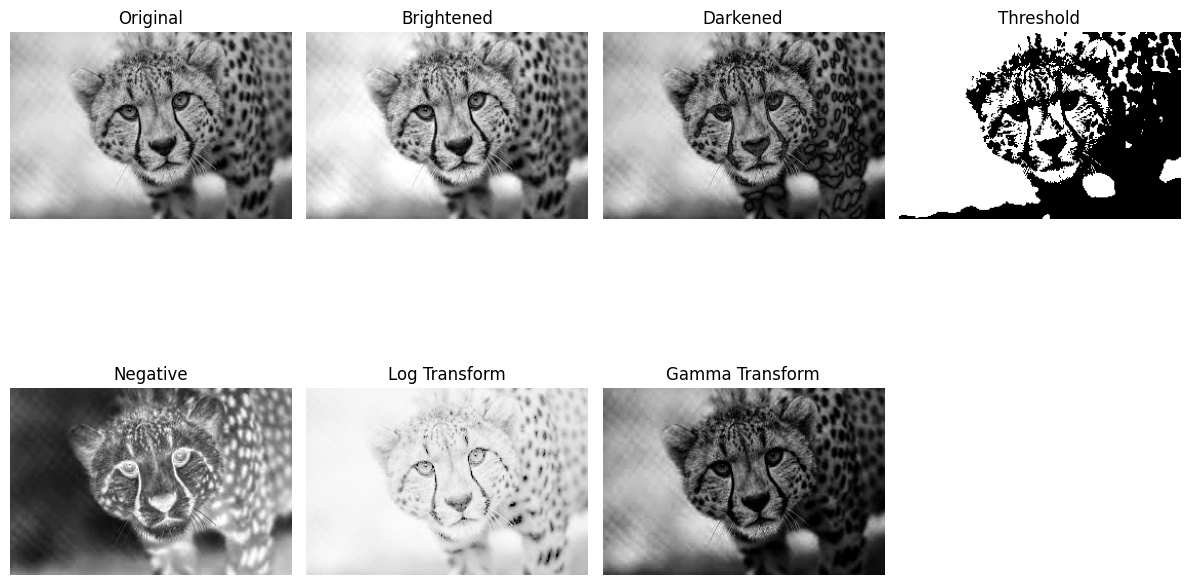

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load 8-bit grayscale image
image = cv2.imread('/content/fdip.jpeg', cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Image not found.")
    exit()
    # (a) Brightness improvement
bright_img = cv2.convertScaleAbs(image, alpha=1, beta=50)  # increase brightness by 50

# (b) Brightness reduction
dark_img = cv2.convertScaleAbs(image, alpha=1, beta=-50)  # decrease brightness by 50

# (c) Thresholding
_, threshold_img = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# (d) Negative of an image
negative_img = 255 - image

# (e) Log transformation
c = 255 / np.log(1 + np.max(image))
log_img = c * np.log(1 + image.astype(np.float32))
log_img = np.uint8(np.clip(log_img, 0, 255))

# (f) Power Law (Gamma) transformation
gamma = 2.0  # change this value for different effects
power_img = np.array(255 * (image / 255) ** gamma, dtype='uint8')

# Displaying all images
titles = ['Original', 'Brightened', 'Darkened', 'Threshold', 'Negative', 'Log Transform', 'Gamma Transform']
images = [image, bright_img, dark_img, threshold_img, negative_img, log_img, power_img]

plt.figure(figsize=(12, 8))
for i in range(7):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
